In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in the training data and look at the first 10 rows
originalTrain = pd.read_csv('train.csv')
originalTrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
#suppress warnings for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [3]:
#looking at the number of feature's non-null values and type
originalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#seeing the total null values for each feature
originalTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#checking the number of unique values for each feature
originalTrain.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
#checking the unique feature values for Embarked
originalTrain['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
#check the rows where Embarked is unknown
originalTrain.loc[originalTrain['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


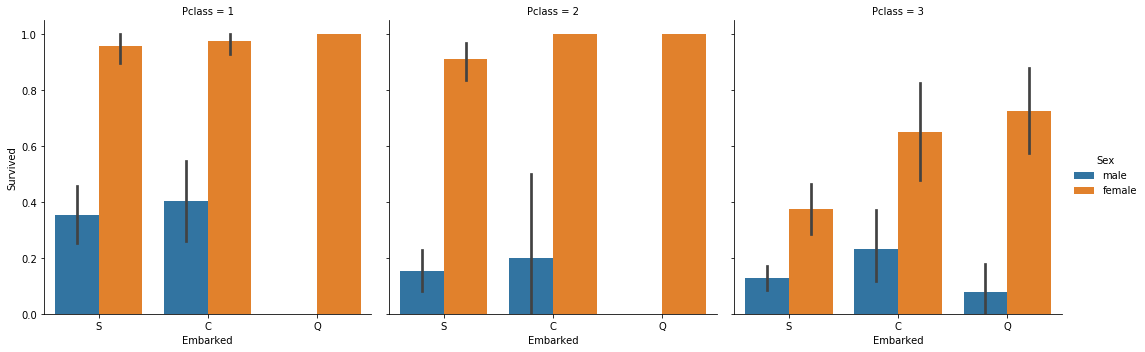

In [44]:
#Likelihood of survival for the different travel classes based on embarked location and sex
sns.factorplot(x = 'Embarked', y = 'Survived', data = originalTrain, kind = 'bar', hue = 'Sex', col = 'Pclass')

In [9]:
#for now, classifying the two unknown Embarked values as Q based on the above graph
originalTrain.at[61, 'Embarked'] =  'Q'
originalTrain.at[829, 'Embarked'] = 'Q'
originalTrain['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
#producing a feature with solely the cabin letters
originalTrain['Cabin Letter'] = [x[0] if type(x)== str else float('nan') for x in originalTrain['Cabin']]
originalTrain['Cabin Letter'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

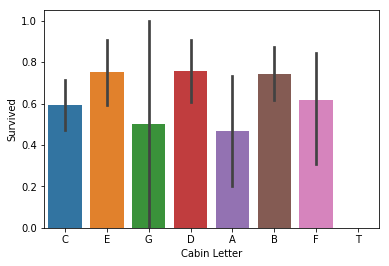

In [11]:
#probability of survival based on Cabin Letter
sns.barplot(x='Cabin Letter',y='Survived',data=originalTrain)

# Preprocessing and Feature Engineering

In [12]:
#drop features that have too many missing values or don't seem relevant for prediction
manipTrain = originalTrain.drop(['Cabin Letter','Cabin','PassengerId','Ticket'], axis = 1)

In [13]:
#change Sex into binary classifier with male as 1 and female as 0
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
sex1hot = encoder.fit_transform(manipTrain['Sex'])

In [14]:
#add the array with binary classification of male and female to the training set
manipTrain['Binary Sex'] = sex1hot
#confirm that binary classification of sex was performed correctly
manipTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [15]:
#dropping the original Sex feature
manipTrain.drop('Sex',axis = 1, inplace = True)

In [16]:
#from Name feature, extract the Title of the individual
manipTrain['Title'] = [line.split(",")[1].split(".")[0][1:] for line in manipTrain['Name']]
manipTrain.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,0,Mrs
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,1,Mr


In [17]:
#all unique values for the Title feature
manipTrain['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [18]:
#checking the number of unique values in Title feature
manipTrain['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Mme               1
Lady              1
Ms                1
Jonkheer          1
Don               1
Sir               1
Capt              1
Name: Title, dtype: int64

In [19]:
#drop the original Name feature
manipTrain.drop('Name', axis = 1, inplace = True)

In [20]:
#find the row that uses the Countess as its value for the Title feature
manipTrain.loc[manipTrain['Title'] == 'the Countess']

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
759,1,1,33.0,0,0,86.5,S,0,the Countess


In [21]:
#find the indices where the value for Title is 'the Countess'
countess = manipTrain.index[manipTrain['Title'] == 'the Countess'].tolist()
print(countess)

[759]


In [22]:
#recategorizing some of the titles from Title feature
for i in countess:
    manipTrain.at[i, 'Title'] = 'Nobility'
jonkheer = manipTrain.index[manipTrain['Title'] == 'Jonkheer'].tolist()
for i in jonkheer:
    manipTrain.at[i, 'Title'] = 'Nobility'
mme = manipTrain.index[manipTrain['Title'] == 'Mme'].tolist()
for i in mme:
    manipTrain.at[i, 'Title'] = 'Mrs'
mlle = manipTrain.index[manipTrain['Title'] == 'Mlle'].tolist()
for i in mlle:
    manipTrain.at[i, 'Title'] = 'Miss'
ms = manipTrain.index[manipTrain['Title'] == 'Ms'].tolist()
for i in ms:
    manipTrain.at[i, 'Title'] = 'Miss'
don = manipTrain.index[manipTrain['Title'] == 'Don'].tolist()
for i in don:
    manipTrain.at[i, 'Title'] = 'Nobility'
lady = manipTrain.index[manipTrain['Title'] == 'Lady'].tolist()
for i in lady:
    manipTrain.at[i, 'Title'] = 'Nobility'
sir = manipTrain.index[manipTrain['Title'] == 'Sir'].tolist()
for i in sir:
    manipTrain.at[i, 'Title'] = 'Nobility'
capt = manipTrain.index[manipTrain['Title'] == 'Capt'].tolist()
for i in capt:
    manipTrain.at[i, 'Title'] = 'Military'
major = manipTrain.index[manipTrain['Title'] == 'Major'].tolist()
for i in major:
    manipTrain.at[i, 'Title'] = 'Military'
col = manipTrain.index[manipTrain['Title'] == 'Col'].tolist()
for i in col:
    manipTrain.at[i, 'Title'] = 'Military'

In [23]:
#checking the number of unique values in Title feature
manipTrain['Title'].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Military      5
Nobility      5
Name: Title, dtype: int64

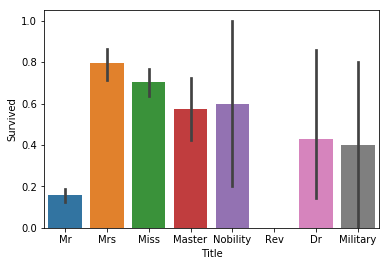

In [24]:
#bar plot of Title and probability of Survival
sns.barplot(x='Title',y='Survived',data=manipTrain)

In [25]:
#seeing the total null values for each feature
manipTrain.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
Binary Sex      0
Title           0
dtype: int64

In [26]:
#description of each feature in manipTrain dataframe
manipTrain.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Binary Sex
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [27]:
#drop Survived feature for training
preTrain = manipTrain.drop('Survived',axis=1)

In [28]:
preTrain.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,22.0,1,0,7.2500,S,1,Mr
1,1,38.0,1,0,71.2833,C,0,Mrs
2,3,26.0,0,0,7.9250,S,0,Miss
3,1,35.0,1,0,53.1000,S,0,Mrs
4,3,35.0,0,0,8.0500,S,1,Mr


In [30]:
#used from https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/
#import necessary libaries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [40]:
#Imputer uses median value instead of null values in Age feature
#StandardScaler standardizes the Age and Fare features
#OneHotEncoder, ignore previously unseen values when transforming the test set; add columns to turn
#the categorical values into binary features
preprocess = make_column_transformer(
    (['Age','Fare'], make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler())),
    (['Pclass','SibSp','Parch','Embarked','Binary Sex','Title'], OneHotEncoder(handle_unknown='ignore'))
)
preprocess.fit_transform(preTrain).toarray()[:5]


array([[-0.5924806 , -0.50244517,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.63878901,  0.78684529,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [-0.2846632 , -0.48885426,  0.        ,  0.    

In [32]:
#import the different ML algorithms to test
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [33]:
#create a pipeline with the preprocessing from above and using Logistic Regression
models = [
    LogisticRegression(),
    LinearSVC(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(kernel = "rbf"),
    BernoulliNB()
]

In [45]:
#provide accuracy scores for all the different models, along with the mean and standard deviation based on the
#cross validation with k = 5
from sklearn.model_selection import cross_val_score
modelNameList = []
meanModelScores = []
sdModelScores = []
for model in models:
    modelName = model.__class__.__name__
    actualModel = make_pipeline(
    preprocess,
    model)
    scores = cross_val_score(actualModel, preTrain, manipTrain['Survived'], scoring = 'accuracy',cv = 5)
    meanScore = scores.mean()
    sdScore = np.std(scores)
    modelNameList.append(modelName)
    meanModelScores.append(meanScore)
    sdModelScores.append(sdScore)

In [35]:
#output the mean accuracy score and 95% CI based on the cross validation with K = 5
for (a, b, c) in zip(modelNameList, meanModelScores, sdModelScores):
    print("{} has an accuracy score of {} with 95% confidence interval ({},{})"
          .format(a,b.round(decimals = 4),(b-(2*c)).round(decimals = 4),(b+(2*c)).round(decimals = 4)))

LogisticRegression has an accuracy score of 0.8182 with 95% confidence interval (0.7733,0.8632)
LinearSVC has an accuracy score of 0.8204 with 95% confidence interval (0.7845,0.8564)
RandomForestClassifier has an accuracy score of 0.8071 with 95% confidence interval (0.7296,0.8846)
DecisionTreeClassifier has an accuracy score of 0.7711 with 95% confidence interval (0.7252,0.8169)
SVC has an accuracy score of 0.8114 with 95% confidence interval (0.7738,0.8489)
BernoulliNB has an accuracy score of 0.7957 with 95% confidence interval (0.7681,0.8233)


In [36]:
#create the pipeline for each of the different machine learning algorithms
logreg = make_pipeline(
    preprocess,
    LogisticRegression()),
linsvc = make_pipeline(
    preprocess,
    LinearSVC()),
rf = make_pipeline(
    preprocess,
    RandomForestClassifier()),
dt = make_pipeline(
    preprocess,
    DecisionTreeClassifier()),
svc = make_pipeline(
    preprocess,
    SVC(kernel = "rbf"))
bnb = make_pipeline(
    preprocess,
    BernoulliNB())

# Hard Voting Classifier

In [46]:
#use a hard voting classifier to check prediction accuracy
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('logreg', make_pipeline(preprocess, LogisticRegression())), 
                ('linsvc', make_pipeline(preprocess, LinearSVC())), 
                ('rf', make_pipeline(preprocess, RandomForestClassifier())), 
                ('dt', make_pipeline(preprocess,DecisionTreeClassifier())), 
                ('svc', make_pipeline(preprocess,SVC(kernel = "rbf"))),
                ('bnb',make_pipeline(preprocess,BernoulliNB()))],
    voting = 'hard'
)
score = cross_val_score(voting_clf, preTrain, manipTrain['Survived'], scoring = 'accuracy',cv = 5)
meanScore = score.mean()
sdScore = np.std(score)

In [47]:
#Seeing the output of a hard voting classifier, which aggregates predictions from each classifier and predicts the
#class that gets the most votes
print("Voting classifier has an accuracy score of {} with 95% confidence interval ({},{})"
      .format(meanScore.round(decimals = 4),(meanScore-(2*sdScore)).round(decimals = 4),
              (meanScore+(2*sdScore)).round(decimals = 4)))

Voting classifier has an accuracy score of 0.8283 with 95% confidence interval (0.7753,0.8814)


In [48]:
#import test data
testData = pd.read_csv('test.csv')
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
#remove same features as training set
preTest = testData.drop(['PassengerId','Cabin','Ticket'],axis = 1)

In [50]:
#change Sex into binary classifier with male as 1 and female as 0; use encoder from training set
testsex1hot = encoder.transform(preTest['Sex'])
preTest['Binary Sex'] = testsex1hot
preTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


In [51]:
#drop original Sex feature
preTest.drop('Sex', axis=1, inplace = True)

In [52]:
preTest['Title'] = [line.split(",")[1].split(".")[0][1:] for line in preTest['Name']]
preTest.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,"Kelly, Mr. James",34.5,0,0,7.8292,Q,1,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,S,0,Mrs
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,Q,1,Mr
3,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,S,1,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,S,0,Mrs


In [53]:
preTest.drop('Name',axis=1,inplace=True)
preTest.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,34.5,0,0,7.8292,Q,1,Mr
1,3,47.0,1,0,7.0000,S,0,Mrs
2,2,62.0,0,0,9.6875,Q,1,Mr
3,3,27.0,0,0,8.6625,S,1,Mr
4,3,22.0,1,1,12.2875,S,0,Mrs


In [54]:
preTest['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [55]:
#recategorizing some of the values from Title feature
ms = preTest.index[preTest['Title'] == 'Ms'].tolist()
for i in ms:
    preTest.at[i, 'Title'] = 'Miss'
dona = preTest.index[preTest['Title'] == 'Dona'].tolist()
for i in dona:
    preTest.at[i, 'Title'] = 'Nobility'
col = preTest.index[preTest['Title'] == 'Col'].tolist()
for i in col:
    preTest.at[i, 'Title'] = 'Military'

In [56]:
preTest['Title'].value_counts()

Mr          240
Miss         79
Mrs          72
Master       21
Rev           2
Military      2
Nobility      1
Dr            1
Name: Title, dtype: int64

In [57]:
#check the features with null values
preTest.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
Binary Sex     0
Title          0
dtype: int64

In [58]:
#use the preprocess from the training set
preprocess.transform(preTest).toarray()[:5]

array([[ 0.36944878, -0.49078316,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 1.33137817, -0.50747884,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [ 2.48569343, -0.45336687,  0.        ,  1.    

In [59]:
#predicting using a hard voting classifier algorithm
voting = voting_clf.fit(preTrain, manipTrain['Survived'])
votingPredict = voting.predict(preTest)

In [60]:
#reshape the dimensions into a 418*1 array
votingPredicts = np.reshape(votingPredict, (-1, 1))
votingPredicts.shape

(418, 1)

In [61]:
#prepare for Kaggle submission
testFinal = testData[['PassengerId']]
testFinal['Survived'] = votingPredicts

# Hard Voting Classifier Prediction Accuracy

In [62]:
#export a csv file with the hard voting classifier algorithm
testFinal.to_csv('2019TitanicHardVoting.csv', index = False)
#score currently 0.78947 (correct Survival prediction of 78.947%)

# Soft Voting Classifier

In [63]:
#using a soft voting classifier instead of hard voting classifier (pg. 182-184 Hands On ML with Scikit-Learn...)
softVoting_clf = VotingClassifier(
    estimators=[('softlogreg', make_pipeline(preprocess,LogisticRegression())), #won't allow specifying var outside 
                ('softrf', make_pipeline(preprocess,RandomForestClassifier())), 
                ('softsvc', make_pipeline(preprocess,SVC(kernel = "rbf", probability = True)))],
    voting = 'soft'
)
softVoting = softVoting_clf.fit(preTrain, manipTrain['Survived'])

In [64]:
#predicting using a soft voting classifier algorithm
softVotingPredict = softVoting.predict(preTest)
#reshape the dimensions into a 418*1 array
softVotingPredicts = np.reshape(softVotingPredict, (-1, 1))
softVotingPredicts.shape

(418, 1)

# Soft Voting Classifier Prediction Accuracy

In [65]:
#prepare for Kaggle submission
softVoteTestFinal = testData[['PassengerId']]
softVoteTestFinal['Survived'] = softVotingPredicts

#export a csv file with the soft voting classifier algorithm
softVoteTestFinal.to_csv('2019TitanicSoftVoting.csv', index = False)
#score currently 0.79904 (correct Survival prediction of 79.904%)